In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df1 = pd.read_csv('city_day.csv')
df2 = pd.read_csv('city_hour.csv')
df3 = pd.read_csv('station_day.csv')
df4 = pd.read_csv('station_hour.csv')
df5 = pd.read_csv('stations.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [88]:
df1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


### Analysis of COVID-19 on Air Quality in India

Lockdown began in India on 25th March 2020. From bottleneck traffic blockages across the city, we saw deserted highways. 
In this analysis we will determine the if there was an actual dramatic change in the Air quality across various Indian Cities.

In [89]:
df2.head(10) #City hour csv , hourly analysis.

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
5,Ahmedabad,2015-01-01 06:00:00,NaN,NaN,0.33,15.95,10.82,NaN,0.33,29.87,64.25,0.0,0.0,0.0,NaN,NaN
6,Ahmedabad,2015-01-01 07:00:00,NaN,NaN,0.45,15.94,12.47,NaN,0.45,27.41,191.96,0.0,0.0,0.0,NaN,NaN
7,Ahmedabad,2015-01-01 08:00:00,NaN,NaN,1.03,16.66,16.48,NaN,1.03,20.92,177.21,0.0,0.0,0.0,NaN,NaN
8,Ahmedabad,2015-01-01 09:00:00,NaN,NaN,1.47,16.25,18.02,NaN,1.47,16.45,122.08,0.0,0.0,0.0,NaN,NaN
9,Ahmedabad,2015-01-01 10:00:00,NaN,NaN,2.05,13.78,16.08,NaN,2.05,15.14,NaN,0.0,0.0,0.0,NaN,NaN


#### There are lots of Nan Values which can't be removed thus we shall group by city and fill in the columns with the mean of that particular city. Nan valued rows for AQI are dropped. 

In [90]:
df1 = df1[df1['AQI'].notna()]
df1.shape
df1.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [91]:
##df1["PM2.5"] = df1.groupby("City").transform(lambda x: x.fillna(x.mean()))

In [92]:
df1[['PM2.5', 'PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']] = df1.groupby(['City'])['PM2.5', 'PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']\
    .transform(lambda x: x.fillna(x.mean()))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [93]:
df1.isnull().sum()

City              0
Date              0
PM2.5             0
PM10           1893
NO                0
NO2               0
NOx             771
NH3            1334
CO                0
SO2               0
O3              153
Benzene        2259
Toluene        4084
Xylene        12381
AQI               0
AQI_Bucket        0
dtype: int64

In [94]:
df1.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,112.786826,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,112.786826,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,112.786826,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,112.786826,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,112.786826,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [95]:
precovid = df1.loc[(df1['Date'] > '2014-12-31') & (df1['Date'] < '2020-03-24')]
precovid = precovid.groupby("City").mean()
precovid.head()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,70.908701,114.765862,23.854449,63.222143,50.512565,NaN,23.853081,57.970996,38.636345,6.189457,31.860387,4.984397,478.452265
Aizawl,36.000000,44.086667,4.601667,1.071667,6.630000,24.634167,0.481667,4.976667,5.657500,10.568333,10.983333,NaN,59.583333
Amaravati,40.748318,80.673708,4.712953,23.684831,16.409179,12.546196,0.633939,14.156008,38.930674,0.621317,2.147271,0.770518,101.132254
Amritsar,57.459018,118.013303,18.584201,18.747481,36.114684,14.177858,0.545419,8.140850,21.451595,4.492442,3.238766,7.644652,123.597868
Bengaluru,36.635243,85.277120,9.671067,29.127226,20.031008,22.968243,1.721714,5.186169,32.999438,1.836426,4.378998,NaN,95.881768


In [96]:
precovid.shape

(26, 13)

In [97]:
list(precovid.index)

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [98]:
postcovid = df1.loc[(df1['Date'] > '2020-03-25') & (df1['Date'] < '2020-06-01')]
postcovid = postcovid.groupby("City").mean()
postcovid.head()
#postcovid.shape
#print (list(postcovid.index))

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
City,,,,,,,,,,,,,
Ahmedabad,28.815373,78.923881,3.698507,21.775821,13.185373,NaN,1.394179,36.618856,49.710746,4.353582,22.368657,1.996866,128.208955
Aizawl,18.471194,24.278358,9.284925,0.312687,12.447463,21.427164,0.295075,8.065373,3.744820,7.284530,7.789490,NaN,35.238806
Amaravati,21.005674,47.662985,1.508657,5.765821,4.222985,8.030746,0.414862,13.832574,30.152090,0.322985,0.436567,4.010200,53.283582
Amritsar,26.455410,67.639836,20.902787,14.781967,30.370000,12.891967,0.726393,10.475738,34.108689,1.317213,1.276230,5.864098,68.918033
Bengaluru,23.438209,53.087015,3.265970,13.416418,14.230000,9.992537,0.759552,6.227910,36.554627,0.287463,3.062388,NaN,70.567164


In [99]:
postcovid.shape

(26, 13)

In [100]:
list(postcovid.index)

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

Text(0.5, 1.0, 'Pre Covid PM2.5 levels in the atmosphere')

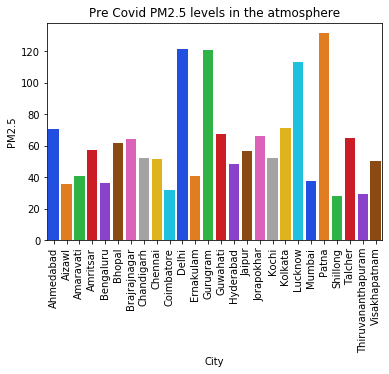

In [101]:
PV = sns.barplot(x=precovid.index, y=precovid['PM2.5'], palette = "bright")
PV.set_xticklabels(PV.get_xticklabels(), rotation=90)
plt.title("Pre Covid PM2.5 levels in the atmosphere")

Text(0.5, 1.0, 'Pre Covid PM2.5 levels in the atmosphere')

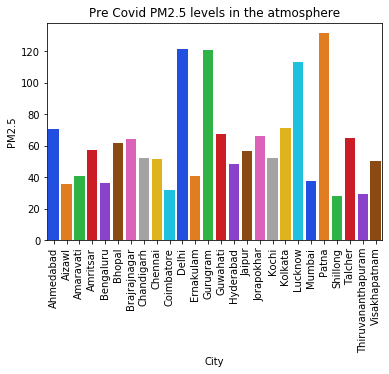

In [102]:
PV = sns.barplot(x=postcovid.index, y=precovid['PM2.5'], palette = "bright")
PV.set_xticklabels(PV.get_xticklabels(), rotation=90)
plt.title("Pre Covid PM2.5 levels in the atmosphere")

SUPER HIGH FOR PATNA, DELHI, LUCKNOW AND GURUGRAM

Text(0.5, 1.0, 'Pre Covid SO2 levels in the atmosphere')

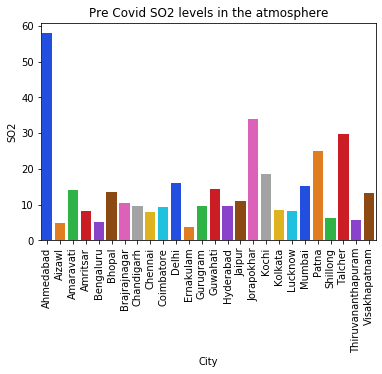

In [103]:
PV = sns.barplot(x=precovid.index, y=precovid['SO2'], palette = "bright")
PV.set_xticklabels(PV.get_xticklabels(), rotation=90)
plt.title("Pre Covid SO2 levels in the atmosphere")

Text(0.5, 1.0, 'Pre Covid SO2 levels in the atmosphere')

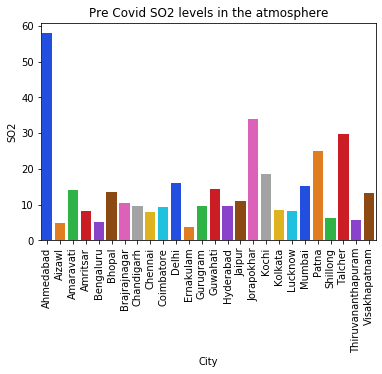

In [104]:
PV = sns.barplot(x=postcovid.index, y=precovid['SO2'], palette = "bright")
PV.set_xticklabels(PV.get_xticklabels(), rotation=90)
plt.title("Pre Covid SO2 levels in the atmosphere")

ABNORMALLY HIGH FOR AHMEDABAD

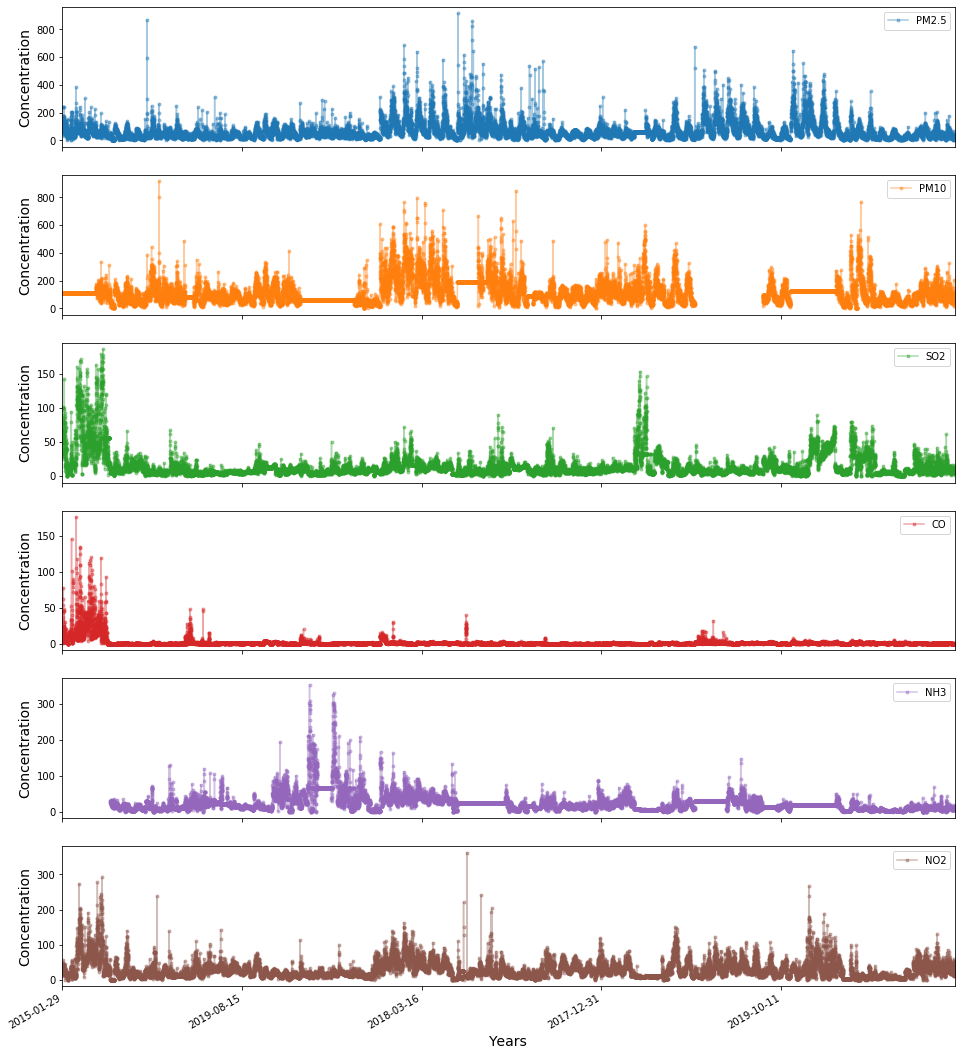

In [105]:
df1.set_index('Date',inplace=True)  # only run this line once, second time it will give out error!!!
pollutants=['PM2.5','PM10','SO2','CO','NH3','NO2']

axes=df1[pollutants].plot(marker='.',figsize=(16,20),subplots=True,alpha=0.4)
for axes in axes:
    axes.set_xlabel('Years',fontsize=14)
    axes.set_ylabel('Concentration',fontsize=14)
plt.show()

### CURRENTLY DATE IS AN OBJECT CONVERT TO DATE TYPE FOR BETTER VISUALIZATIONS (2019 VS 2020)

In [106]:
x=df1.groupby('City')['CO'].max().sort_values(ascending=False).reset_index()
x.head()

,City,CO
0,Ahmedabad,175.81
1,Bengaluru,48.07
2,Gurugram,39.80
3,Lucknow,32.22
4,Delhi,30.44


In [107]:
x=df1.groupby('City')['SO2'].max().sort_values(ascending=False).reset_index()
x.head()

,City,SO2
0,Ahmedabad,186.08
1,Jorapokhar,153.19
2,Gurugram,89.91
3,Patna,89.52
4,Talcher,79.83


In [108]:
x=df1.groupby('City')['NO2'].max().sort_values(ascending=False).reset_index()
x.head()

,City,NO2
0,Gurugram,362.21
1,Ahmedabad,292.02
2,Patna,266.46
3,Amritsar,237.27
4,Delhi,162.50
